In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
neighborhoods_data = newyork_data['features']

In [9]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [10]:
for data in neighborhoods_data:
    borough = neighborhoods_name = data ['properties']['borough']
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
counts = neighborhoods ['Borough'].value_counts().to_dict()
print (counts)

{'Queens': 81, 'Brooklyn': 70, 'Staten Island': 63, 'Bronx': 52, 'Manhattan': 40}


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [16]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [17]:
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [20]:
CLIENT_ID = 'T5PSUD02XP0DCAYQX2KKGBFYUTFREUWXYFOBBM4BYVD0MTUL' # your Foursquare ID
CLIENT_SECRET = '4SPH2KURQ0CFIJQ3KNGZWETWFZ2WAOMCBERB0KQMJHCR5FEO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T5PSUD02XP0DCAYQX2KKGBFYUTFREUWXYFOBBM4BYVD0MTUL
CLIENT_SECRET:4SPH2KURQ0CFIJQ3KNGZWETWFZ2WAOMCBERB0KQMJHCR5FEO


In [21]:
radius= 500
limit = 100
def getNearbyVenues(names, latitudes,longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names,latitudes,longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit) # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
brooklyn_venues = getNearbyVenues(names= brooklyn_data['Neighborhood'],
                                   latitudes= brooklyn_data['Latitude'],
                                   longitudes= brooklyn_data['Longitude'],
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [24]:
brooklyn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot


In [25]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,46,46,46,46,46,46
Bay Ridge,83,83,83,83,83,83
Bedford Stuyvesant,29,29,29,29,29,29
Bensonhurst,33,33,33,33,33,33
Bergen Beach,6,6,6,6,6,6
Boerum Hill,95,95,95,95,95,95
Borough Park,25,25,25,25,25,25
Brighton Beach,43,43,43,43,43,43
Broadway Junction,14,14,14,14,14,14


In [26]:
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Tur

In [27]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()

In [28]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.07
1           Gas Station  0.04
2  Cantonese Restaurant  0.04
3  Fast Food Restaurant  0.04
4    Italian Restaurant  0.04


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.07
1          Pizza Place  0.06
2                  Spa  0.05
3     Greek Restaurant  0.04
4  American Restaurant  0.04


----Bedford Stuyvesant----
           venue  freq
0    Coffee Shop  0.10
1            Bar  0.07
2    Pizza Place  0.07
3  Deli / Bodega  0.07
4           Café  0.07


----Bensonhurst----
                venue  freq
0      Ice Cream Shop  0.06
1          Donut Shop  0.06
2  Italian Restaurant  0.06
3         Pizza Place  0.06
4    Sushi Restaurant  0.06


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.33
1        Hockey Field  0.17
2  Athletics & Sports  0.17
3      Baseball Field  0.17
4          Playground  0.17


----Boerum Hill----
                    venue  freq
0    

            venue  freq
0     Pizza Place  0.31
1     Candy Store  0.08
2   Moving Target  0.08
3  Ice Cream Shop  0.08
4     Flower Shop  0.08


----Mill Basin----
                 venue  freq
0          Pizza Place  0.08
1   Chinese Restaurant  0.08
2  Japanese Restaurant  0.08
3        Grocery Store  0.05
4                 Bank  0.05


----Mill Island----
                  venue  freq
0             Locksmith  0.33
1                  Pool  0.33
2     Other Repair Shop  0.33
3       Organic Grocery  0.00
4  Pakistani Restaurant  0.00


----New Lots----
                 venue  freq
0  Fried Chicken Joint  0.11
1        Grocery Store  0.11
2          Pizza Place  0.11
3       Discount Store  0.06
4     Asian Restaurant  0.06


----North Side----
         venue  freq
0  Coffee Shop  0.10
1  Pizza Place  0.06
2     Wine Bar  0.05
3  Yoga Studio  0.04
4       Bakery  0.03


----Ocean Hill----
                             venue  freq
0                    Deli / Bodega  0.15
1               

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Donut Shop,Gas Station,Italian Restaurant,Fast Food Restaurant,Cantonese Restaurant,Bubble Tea Shop,Sushi Restaurant,Pharmacy,Pizza Place
1,Bay Ridge,Italian Restaurant,Pizza Place,Spa,Grocery Store,Greek Restaurant,American Restaurant,Bar,Bagel Shop,Hookah Bar,Café
2,Bedford Stuyvesant,Coffee Shop,Pizza Place,Deli / Bodega,Café,Bar,Bus Stop,BBQ Joint,Gift Shop,Boutique,Gourmet Shop
3,Bensonhurst,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Pizza Place,Italian Restaurant,Donut Shop,Pet Store,Furniture / Home Store,Noodle House,Liquor Store
4,Bergen Beach,Harbor / Marina,Baseball Field,Playground,Hockey Field,Athletics & Sports,Field,Factory,Falafel Restaurant,Farm,Farmers Market
5,Boerum Hill,Dance Studio,Coffee Shop,Sandwich Place,Bar,Furniture / Home Store,French Restaurant,Spa,Bakery,Arts & Crafts Store,Yoga Studio
6,Borough Park,Bank,Pizza Place,Café,Grocery Store,Pharmacy,Deli / Bodega,Fast Food Restaurant,Farmers Market,Men's Store,Coffee Shop
7,Brighton Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Sushi Restaurant,Gourmet Shop,Beach,Bank,Mobile Phone Shop,Supplement Shop,Supermarket
8,Broadway Junction,Donut Shop,Fried Chicken Joint,Burger Joint,Breakfast Spot,Sandwich Place,Gas Station,Bus Stop,Nightclub,Sports Bar,Ice Cream Shop
9,Brooklyn Heights,Deli / Bodega,Yoga Studio,Park,Italian Restaurant,Bakery,Cosmetics Shop,Gym,Scenic Lookout,Asian Restaurant,Indian Restaurant


In [31]:
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)
kmeans.labels_[0:70]

array([3, 3, 0, 3, 3, 0, 3, 3, 4, 0, 3, 0, 1, 0, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 4, 3, 0, 4, 4, 4, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 0, 3, 3, 1, 0, 0, 3, 4, 0, 4, 4, 3, 3, 0, 3, 3, 0,
       3, 0, 0, 3], dtype=int32)

In [32]:
brooklyn_merged = brooklyn_data

brooklyn_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
brooklyn_merged.head(70)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,3,Italian Restaurant,Pizza Place,Spa,Grocery Store,Greek Restaurant,American Restaurant,Bar,Bagel Shop,Hookah Bar,Café
1,Brooklyn,Bensonhurst,40.611009,-73.995180,3,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Pizza Place,Italian Restaurant,Donut Shop,Pet Store,Furniture / Home Store,Noodle House,Liquor Store
2,Brooklyn,Sunset Park,40.645103,-74.010316,0,Mexican Restaurant,Bakery,Mobile Phone Shop,Latin American Restaurant,Bank,Pizza Place,Gym,Deli / Bodega,Fried Chicken Joint,Women's Store
3,Brooklyn,Greenpoint,40.730201,-73.954241,3,Bar,Cocktail Bar,Coffee Shop,Pizza Place,French Restaurant,Mexican Restaurant,Record Shop,Yoga Studio,Tea Room,Grocery Store
4,Brooklyn,Gravesend,40.595260,-73.973471,3,Lounge,Chinese Restaurant,Pizza Place,Bakery,Martial Arts School,Italian Restaurant,Farmers Market,Gym,Bar,Men's Store
5,Brooklyn,Brighton Beach,40.576825,-73.965094,0,Eastern European Restaurant,Restaurant,Russian Restaurant,Sushi Restaurant,Gourmet Shop,Beach,Bank,Mobile Phone Shop,Supplement Shop,Supermarket
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,3,Dessert Shop,Turkish Restaurant,Sandwich Place,Yoga Studio,Café,Russian Restaurant,Restaurant,Creperie,Pizza Place,Boat or Ferry
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,3,Pizza Place,Cosmetics Shop,Ice Cream Shop,Bagel Shop,Donut Shop,Chinese Restaurant,Bank,Restaurant,Steakhouse,Convenience Store
8,Brooklyn,Flatbush,40.636326,-73.958401,4,Deli / Bodega,Coffee Shop,Caribbean Restaurant,Mexican Restaurant,Bank,Bagel Shop,Pizza Place,Pharmacy,Donut Shop,Sandwich Place
9,Brooklyn,Crown Heights,40.670829,-73.943291,0,Pizza Place,Café,Museum,Supermarket,Salon / Barbershop,Burger Joint,Candy Store,Bakery,Bagel Shop,Coffee Shop


In [33]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Italian Restaurant,Pizza Place,Spa,Grocery Store,Greek Restaurant,American Restaurant,Bar,Bagel Shop,Hookah Bar,Café
1,Bensonhurst,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Pizza Place,Italian Restaurant,Donut Shop,Pet Store,Furniture / Home Store,Noodle House,Liquor Store
3,Greenpoint,Bar,Cocktail Bar,Coffee Shop,Pizza Place,French Restaurant,Mexican Restaurant,Record Shop,Yoga Studio,Tea Room,Grocery Store
4,Gravesend,Lounge,Chinese Restaurant,Pizza Place,Bakery,Martial Arts School,Italian Restaurant,Farmers Market,Gym,Bar,Men's Store
6,Sheepshead Bay,Dessert Shop,Turkish Restaurant,Sandwich Place,Yoga Studio,Café,Russian Restaurant,Restaurant,Creperie,Pizza Place,Boat or Ferry
7,Manhattan Terrace,Pizza Place,Cosmetics Shop,Ice Cream Shop,Bagel Shop,Donut Shop,Chinese Restaurant,Bank,Restaurant,Steakhouse,Convenience Store
10,East Flatbush,Moving Target,Supermarket,Chinese Restaurant,Fast Food Restaurant,Park,Caribbean Restaurant,Pharmacy,Liquor Store,Food & Drink Shop,Department Store
14,Brownsville,Fried Chicken Joint,Restaurant,Playground,Convenience Store,Plaza,Moving Target,Farmers Market,Park,Performing Arts Venue,Chinese Restaurant
15,Williamsburg,Coffee Shop,Bagel Shop,Yoga Studio,Burger Joint,Tapas Restaurant,Taco Place,Liquor Store,Steakhouse,Lounge,Breakfast Spot
17,Bedford Stuyvesant,Coffee Shop,Pizza Place,Deli / Bodega,Café,Bar,Bus Stop,BBQ Joint,Gift Shop,Boutique,Gourmet Shop


In [34]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Flatbush,Deli / Bodega,Coffee Shop,Caribbean Restaurant,Mexican Restaurant,Bank,Bagel Shop,Pizza Place,Pharmacy,Donut Shop,Sandwich Place
24,Park Slope,Coffee Shop,Burger Joint,Bagel Shop,Pizza Place,Italian Restaurant,Mexican Restaurant,Pub,Pet Store,Bakery,Bookstore
27,Starrett City,Bus Station,Pharmacy,Cosmetics Shop,Bus Stop,Donut Shop,Supermarket,Caribbean Restaurant,American Restaurant,Pizza Place,Flea Market
28,Canarsie,Food,Gym,Home Service,Caribbean Restaurant,Asian Restaurant,Thai Restaurant,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
29,Flatlands,Pharmacy,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Bar,Discount Store,Lounge,Video Store,Nightclub,Paper / Office Supplies Store
56,Rugby,Caribbean Restaurant,Grocery Store,Bank,Seafood Restaurant,Sandwich Place,Wings Joint,Pizza Place,Diner,Gas Station,Mobile Phone Shop
58,New Lots,Fried Chicken Joint,Pizza Place,Grocery Store,Bank,Discount Store,Park,Salon / Barbershop,Chinese Restaurant,Carpet Store,Breakfast Spot
59,Paerdegat Basin,Food,Home Service,Gym,Asian Restaurant,Women's Store,Filipino Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [40]:
#Segmentation and Clustering neighborhoods in Toronto
import bs4 as bs
import urllib.request
import pandas as pd

source = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').read()
soup = bs.BeautifulSoup(source,'html.parser')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

In [41]:
list = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    list.append(row)
df = pd.DataFrame(list, columns=["Postal Code", "Borough", "Neighborhood"])
df

,Postal Code,Borough,Neighborhood
0,None,None,None
1,M1A\n,Not assigned\n,Not assigned\n
2,M2A\n,Not assigned\n,Not assigned\n
3,M3A\n,North York\n,Parkwoods\n
4,M4A\n,North York\n,Victoria Village\n
5,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
6,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n"
7,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n"
8,M8A\n,Not assigned\n,Not assigned\n
9,M9A\n,Etobicoke\n,"Islington Avenue, Humber Valley Village\n"


In [43]:
df2 = df.replace('\n','',regex =True)
df2

,Postal Code,Borough,Neighborhood
0,None,None,None
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"


In [44]:
df3 = df2.drop (df2.index[0])
df3.head()

,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [45]:
df4 = df3.groupby(['Postal Code', 'Borough'], sort = False).agg(','.join)
df4.reset_index(inplace = True)
df4.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [46]:
import bs4 as bs
import urllib.request
import pandas as pd

source = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').read()
soup = bs.BeautifulSoup(source,'html.parser')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

In [47]:
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
df = pd.DataFrame(l, columns=["Postal Code", "Borough", "Neighborhood"])

In [48]:
df1 = df[df.Borough != 'Not assigned\n']

In [49]:
df2 = df1.replace('\n',' ', regex = True)

In [50]:
df3 = df2.drop(df2.index[0])

In [51]:
df4 = df3.groupby(['Postal Code', 'Borough'], sort = False).agg(','.join)
df4.reset_index(inplace = True)

In [52]:
url_data = "http://cocl.us/Geospatial_data"
df5 = pd.read_csv(url_data)

In [53]:
for df in (df4, df5):
        df['Postal Code'] = df['Postal Code'].str.strip()

In [54]:
df6= pd.merge(df4, df5, on='Postal Code', how='inner')
df6.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [55]:
# find the number of boroughs in Toronto
print('The dataframe has {} Borough and {} Neighbourhood.'.format(
        len(df6['Borough'].unique()),
        df6.shape[0]
    )
)

The dataframe has 10 Borough and 103 Neighbourhood.


In [56]:
canada_toronto= df6[df6['Borough'].str.contains('Toronto')]
canada_toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [57]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [58]:
# create map of Totonto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(canada_toronto['Latitude'], canada_toronto['Longitude'], 
                           canada_toronto['Borough'],canada_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [35]:
import pandas as pd
df = pd.DataFrame(columns=['Neighborhood', 'Borough'], index=['New York','City of London','Toronto'])
df.loc['New York'] = pd.Series({'Neighborhood':306, 'Borough':5})
df.loc['City of London'] = pd.Series({'Neighborhood':25, 'Borough':0})
df.loc['Toronto'] = pd.Series({'Neighborhood':103, 'Borough':10 })
df

,Neighborhood,Borough
New York,306,5
City of London,25,0
Toronto,103,10


In [36]:
df.sort_values(['Neighborhood'], ascending=False, axis=0, inplace=True)
df.head()

,Neighborhood,Borough
New York,306,5
Toronto,103,10
City of London,25,0


In [38]:
%matplotlib inline 
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

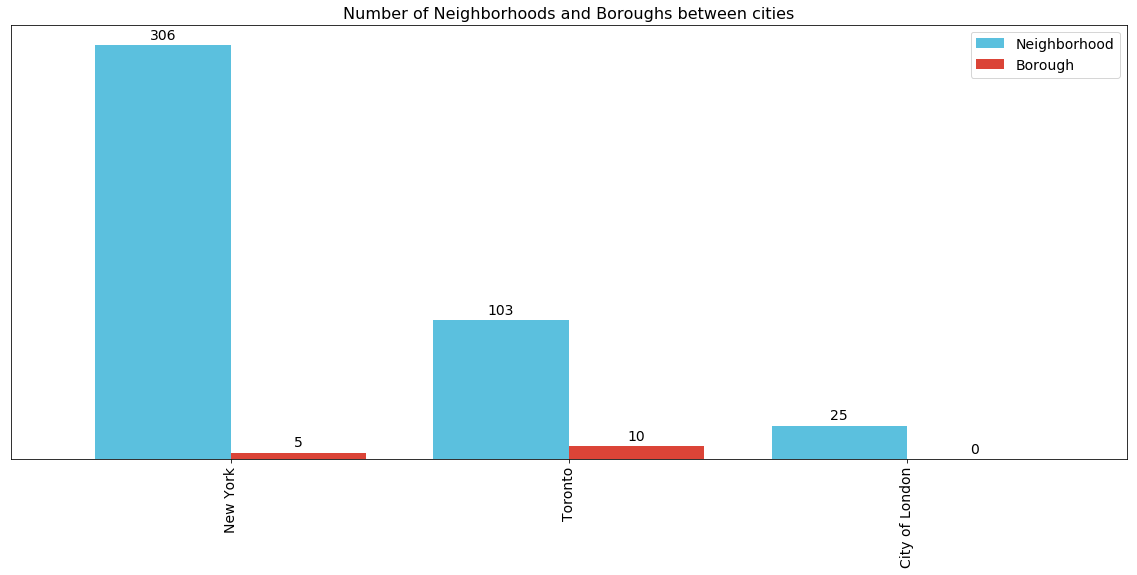

In [39]:
ax = df.plot(kind='bar', 
                figsize=(20, 8),
                rot=90,color = ['#5bc0de', '#db4437'],
                width=.8,
                fontsize=14
               )

ax.set_title('Number of Neighborhoods and Boroughs between cities',fontsize=16)
ax.set_facecolor('white')
ax.legend(fontsize=14,facecolor = 'white') 
ax.get_yaxis().set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()